In [1]:
import torch
from model import *
import numpy as np
from utils import *
from coder.BitsBack import *
from tqdm import tqdm
import time
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
opt = {}


opt["device"] = torch.device("cpu")
opt["if_cuda"] = False

def test(model,test_data,size,c_opt):
    D=np.prod(size)
    theory_list=[]
    true_list=[]
    compression_time=[]
    decompression_time=[]
    for i in tqdm(range(0,len(test_data))):
        test_img=test_data[i:i+1]
        ansstack = ANSStack(c_opt['s_prec'], c_opt['t_prec'],c_opt['p_prec'],randominit=True)
        stack_init_size=ansstack.get_length()
        
        start=time.time()
        ansstack =BBCompression(test_img.numpy(),ansstack,model,c_opt)
        end=time.time()
        compression_time.append(end-start)


        true_list.append((ansstack.get_length()-stack_init_size)/D)
        
        start=time.time()
        decode_img,ansstack=BBDecompression(ansstack,model,c_opt)
        end=time.time()
        decompression_time.append(end-start)
        if (np.int64(decode_img*255).reshape(-1)-np.int64(test_img*255).reshape(-1)).sum().item()>0:
            print('Error')


    return np.asarray(true_list).mean(),np.asarray(compression_time).mean(),np.asarray(decompression_time).mean()

/home/mingtian/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
opt["device"] = torch.device("cpu")
opt['dataset_path']='../data/cifar10'
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='Logistic'
opt['z_channels']=4
opt['z_dim']=opt['z_channels']*64
opt['save_path']='./'+opt['data_set']+'/'+opt['x_dis']+'_z'+str(opt['z_dim'])+'/'
load_name='epoch500.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=256
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='Logistic'
c_opt['optimal']=False

b_bpd,b_c_time,b_d_time=test(model,test_img,c_opt['x_dim'],c_opt)

print('BPD:',b_bpd)
print('averge compression time:',b_c_time)
print('averge decompression time:', b_d_time)

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:53<00:00,  2.11it/s]

BPD: 4.605149739583334
averge compression time: 0.243542644739151
averge decompression time: 0.22901544713973998


In [3]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='Logistic'
opt['z_channels']=4
opt['save_path']='./save_logistic/'
opt['dataset_path']='../data/cifar10'
opt['z_dim']=opt['z_channels']*64
opt['save_path']='./'+opt['data_set']+'/'+opt['x_dis']+'_z'+str(opt['z_dim'])+'/'
load_name='epoch500_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=256
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='Logistic'
c_opt['optimal']=False

r_bpd,r_c_time,r_d_time=test(model,test_img,c_opt['x_dim'],c_opt)

print('BPD:',r_bpd)
print('averge compression time:',r_c_time)
print('averge decompression time:', r_d_time)

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:54<00:00,  2.11it/s]

BPD: 4.586313802083334
averge compression time: 0.2440767457485199
averge decompression time: 0.2298517062664032


In [4]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='Logistic'
opt['z_channels']=4
opt['save_path']='./'+opt['data_set']+'/'+opt['x_dis']+'_z'+str(opt['z_dim'])+'/'
opt['dataset_path']='../data/cifar10'


load_name='epoch500.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=256
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='Logistic'
c_opt['optimal']=True
c_opt['optimal_lr']=1e-3



optimal_bpd=[]
optimal_compression_time=[]
optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_img,c_opt['x_dim'],c_opt=c_opt)
    optimal_bpd.append(bpd)
    optimal_compression_time.append(c_time)
    optimal_decompression_time.append(d_time)
    print(c_opt['iterations'],bpd,c_time,d_time)

    
print(optimal_bpd)
print(optimal_compression_time)
print(optimal_decompression_time)

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:43<00:00,  1.91it/s]


1 4.602138020833333 0.26634430050849917 0.25589850401878356


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:39<00:00,  1.73it/s]


2 4.599530924479167 0.295080304145813 0.28370441651344297


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:58<00:00,  1.67it/s]


3 4.597584309895833 0.3011756598949432 0.2963235890865326


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:38<00:00,  1.57it/s]


4 4.594644205729166 0.32487206053733825 0.31293197202682493


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:08<00:00,  1.49it/s]


5 4.5918759765625 0.33828197383880615 0.3297482509613037


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:39<00:00,  1.43it/s]


6 4.5884443359375 0.3525846316814423 0.34577216601371763


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:10<00:00,  1.37it/s]


7 4.587548177083333 0.3675091440677643 0.36243129801750185


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:44<00:00,  1.31it/s]


8 4.5849248046875 0.3832390670776367 0.3799110963344574


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:19<00:00,  1.25it/s]


9 4.582319010416666 0.40244092369079587 0.39668389868736265


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:50<00:00,  1.20it/s]

10 4.581260091145834 0.4170939996242523 0.412692631483078
[4.602138020833333, 4.599530924479167, 4.597584309895833, 4.594644205729166, 4.5918759765625, 4.5884443359375, 4.587548177083333, 4.5849248046875, 4.582319010416666, 4.581260091145834]
[0.26634430050849917, 0.295080304145813, 0.3011756598949432, 0.32487206053733825, 0.33828197383880615, 0.3525846316814423, 0.3675091440677643, 0.3832390670776367, 0.40244092369079587, 0.4170939996242523]
[0.25589850401878356, 0.28370441651344297, 0.2963235890865326, 0.31293197202682493, 0.3297482509613037, 0.34577216601371763, 0.36243129801750185, 0.3799110963344574, 0.39668389868736265, 0.412692631483078]


In [5]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='Logistic'
opt['z_channels']=4
opt['save_path']='./'+opt['data_set']+'/'+opt['x_dis']+'_z'+str(opt['z_dim'])+'/'
opt['dataset_path']='../data/cifar10'


load_name='epoch500_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=256
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='Logistic'
c_opt['optimal']=True
c_opt['optimal_lr']=1e-3



improved_optimal_bpd=[]
improved_optimal_compression_time=[]
improved_optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_img,c_opt['x_dim'],c_opt=c_opt)
    improved_optimal_bpd.append(bpd)
    improved_optimal_compression_time.append(c_time)
    improved_optimal_decompression_time.append(d_time)
    print(c_opt['iterations'],bpd,c_time,d_time)

    
print(improved_optimal_bpd)
print(improved_optimal_compression_time)
print(improved_optimal_decompression_time)

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:45<00:00,  1.90it/s]


1 4.585474609375 0.26763215303421023 0.2570100436210632


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:23<00:00,  1.77it/s]


2 4.583890625 0.2865599238872528 0.27601779794692993


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:58<00:00,  1.67it/s]


3 4.582124674479166 0.3037405462265015 0.29428106808662413


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:33<00:00,  1.58it/s]


4 4.580689778645833 0.322098073720932 0.310802170753479


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:05<00:00,  1.50it/s]


5 4.5791442057291665 0.3364852697849274 0.3276712169647217


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:37<00:00,  1.43it/s]


6 4.577649088541667 0.3517449123859406 0.3449600222110748


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:15<00:00,  1.36it/s]


7 4.576367838541667 0.37256031537055967 0.3622710509300232


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:42<00:00,  1.31it/s]


8 4.574307291666667 0.3820369470119476 0.37975335359573364


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:17<00:00,  1.25it/s]


9 4.572964518229166 0.40108308696746825 0.39538962006568906


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:49<00:00,  1.21it/s]

10 4.571695638020833 0.41696087694168094 0.4115753061771393
[4.585474609375, 4.583890625, 4.582124674479166, 4.580689778645833, 4.5791442057291665, 4.577649088541667, 4.576367838541667, 4.574307291666667, 4.572964518229166, 4.571695638020833]
[0.26763215303421023, 0.2865599238872528, 0.3037405462265015, 0.322098073720932, 0.3364852697849274, 0.3517449123859406, 0.37256031537055967, 0.3820369470119476, 0.40108308696746825, 0.41696087694168094]
[0.2570100436210632, 0.27601779794692993, 0.29428106808662413, 0.310802170753479, 0.3276712169647217, 0.3449600222110748, 0.3622710509300232, 0.37975335359573364, 0.39538962006568906, 0.4115753061771393]


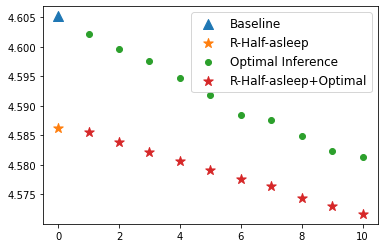

In [7]:
time_steps=np.arange(1,11)

plt.scatter(0,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(0,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(time_steps,optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(time_steps,improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)

plt.legend(prop={'size':12})
# plt.ylim(4.595,4.63)
plt.show()
